<a href="https://colab.research.google.com/github/carlalopezz/UFV-visualizacion/blob/main/Ejercicios_clase/P1_VD_LopezUtrilla_Carla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
!pip install plotly_express
import plotly.express as px
import pandas as pd

In [19]:
# Lectura de los datos
datos = pd.read_csv('datos_ejercicio_ventas.csv', sep=',')
datos.head()

,COUNTRY,SUBBRAND,YEAR,MONTH,SCENARIO,FORECAST,FORECAST_YEAR,AMOUNT
0,Portugal,Lipton (L3),2023,12,AI_forecast,AI_P02F,2023.0,754356.237194
1,Great Britain,Lipton (L3),2023,12,AI_forecast,AI_P10F,2023.0,560030.558029
2,Spain,Pepsi Max (L3),2023,12,AI_forecast,AI_P09F,2023.0,88501.980847
3,Great Britain,7up (L3),2024,12,AI_forecast,AI_P10F,2023.0,363224.511516
4,Hungary,Lipton (L3),2023,9,AI_forecast,AI_P03F,2023.0,396176.120491


# Preprocesamiento


**1. Número de actuals y de forecasts.**

In [20]:
scenario_counts = datos['SCENARIO'].value_counts()
print(scenario_counts)

SCENARIO
AI_forecast    17766
actual           900
Name: count, dtype: int64


**2. Horizonte de predicción**

Primero tenemos que quitar los actuals ya que no nos interesan. Como el horizonte de predicción es siempre el mismo, podemos poner cualquiera de los valores introducidos, por simplicidad cogemos el primero.

In [21]:
# Mapear los códigos de pronóstico a meses
forecast_map = {
    'AI_P02F': 1, 'AI_P03F': 2, 'AI_P04F': 3, 'AI_P05F': 4,
    'AI_P06F': 5, 'AI_P07F': 6, 'AI_P08F': 7, 'AI_P09F': 8,
    'AI_P10F': 9, 'AI_P11F': 10, 'AI_P12F': 11, 'AI_PF': 12
}

# Agregar una nueva columna para el mes de pronóstico
datos['FORECAST_MONTH'] = datos['FORECAST'].map(forecast_map)

# Función para calcular la diferencia en meses entre la fecha de pronóstico y la fecha de los datos
def calculate_month_diff(row):
    forecast_year = row['FORECAST_YEAR']
    forecast_month = row['FORECAST_MONTH']
    data_year = row['YEAR']
    data_month = row['MONTH']

    # Calcular los meses totales para ambas fechas
    forecast_total_months = forecast_year * 12 + forecast_month
    data_total_months = data_year * 12 + data_month

    # Calcular la diferencia en meses
    return data_total_months - forecast_total_months

# Aplicar la función para calcular la diferencia de meses para cada fila
datos['MONTH_DIFF'] = datos.apply(calculate_month_diff, axis=1)

# Encontrar la diferencia máxima por país
max_diff_per_country = datos.groupby('COUNTRY')['MONTH_DIFF'].max().reset_index()

# Mostrar el resultado
print("Diferencia máxima en meses por país (Horizonte):")
print(max_diff_per_country)

Diferencia máxima en meses por país (Horizonte):
         COUNTRY  MONTH_DIFF
0          Czech        18.0
1        Denmark        18.0
2  Great Britain        18.0
3        Hungary        18.0
4          Italy        18.0
5    Netherlands        18.0
6         Norway        18.0
7       Portugal        18.0
8          Spain        18.0


**3. Nº países y de productos**

In [22]:
num_paises = datos['COUNTRY'].nunique()
num_productos = datos['SUBBRAND'].nunique()

print(f'Número de países diferentes: {num_paises}')
print(f'Número de productos (submarcas) diferentes: {num_productos}')


Número de países diferentes: 9
Número de productos (submarcas) diferentes: 6


**4. Histórico**

El valor más antiguo y el más nuevo.

In [23]:
# ACTUALS
pais_concreto = 'Portugal'
datos_actuals_pais = datos[(datos['COUNTRY'] == pais_concreto) & (datos['SCENARIO'] == 'actual')]

if datos_actuals_pais.empty:
    print(f"No hay datos de ventas para {pais_concreto} en el escenario 'actuals'.")
else:
    anio_minimo = datos_actuals_pais['YEAR'].min()
    anio_maximo = datos_actuals_pais['YEAR'].max()

    meses_anio_minimo = datos_actuals_pais[datos_actuals_pais['YEAR'] == anio_minimo]['MONTH']
    mes_minimo = meses_anio_minimo.min()

    meses_anio_maximo = datos_actuals_pais[datos_actuals_pais['YEAR'] == anio_maximo]['MONTH']
    mes_maximo = meses_anio_maximo.max()

    print(f"Primera venta en {pais_concreto}: {anio_minimo}-{mes_minimo:02d}")
    print(f"Última venta en {pais_concreto}: {anio_maximo}-{mes_maximo:02d}")

Primera venta en Portugal: 2023-01
Última venta en Portugal: 2024-08


**5. Distintos tipos de forecasts**

In [24]:
valores_forecast = datos['FORECAST'].unique()

print(f'Los valores únicos de la columna FORECAST son: {valores_forecast}')

Los valores únicos de la columna FORECAST son: ['AI_P02F' 'AI_P10F' 'AI_P09F' 'AI_P03F' 'AI_PF' 'AI_P11F' 'AI_P06F'
 'AI_P05F' 'AI_P07F' 'AI_P12F' 'AI_P08F' 'AI_P04F' nan]


# **1. Cómo se distribuyen las ventas realizadas en:**



In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar solo los datos reales
data_actuals = datos[datos['SCENARIO'] == 'actual']

# Convertir la columna AMOUNT a formato numérico
data_actuals['AMOUNT'] = data_actuals['AMOUNT'].apply(lambda x: float(str(x).replace(",", ".")))

<ipython-input-25-c7d2c93c08eb>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actuals['AMOUNT'] = data_actuals['AMOUNT'].apply(lambda x: float(str(x).replace(",", ".")))


Según país

<ipython-input-26-ad6248b149df>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='COUNTRY', y='AMOUNT', data=sales_by_country, palette='magma')


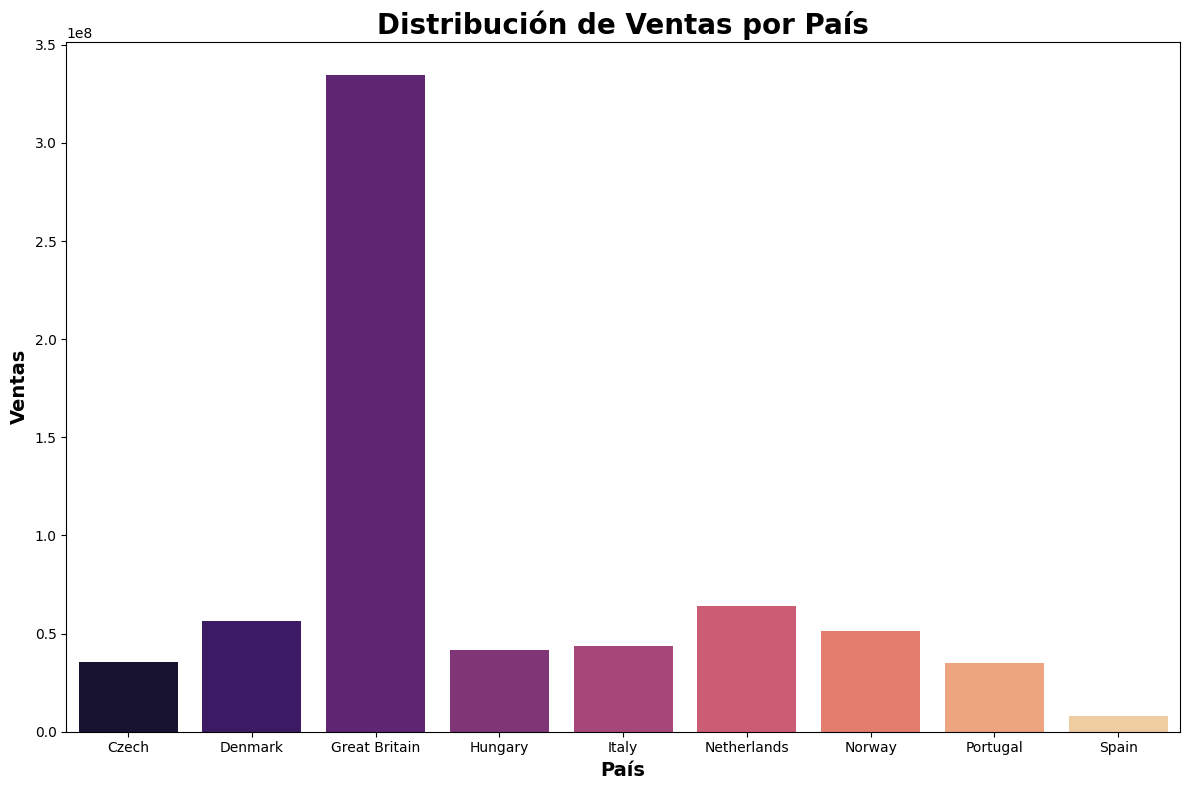

In [26]:
# Agrupar y sumar las ventas por país
sales_by_country = data_actuals.groupby('COUNTRY')['AMOUNT'].sum().reset_index()

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='COUNTRY', y='AMOUNT', data=sales_by_country, palette='magma')
plt.title('Distribución de Ventas por País', fontsize=20, fontweight='bold')
plt.xlabel('País', fontsize=14, fontweight='bold')
plt.ylabel('Ventas', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

Según fecha

<ipython-input-27-337bae8fb744>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_actuals['DATE'] = pd.to_datetime(data_actuals[['YEAR', 'MONTH']].assign(DAY=1))


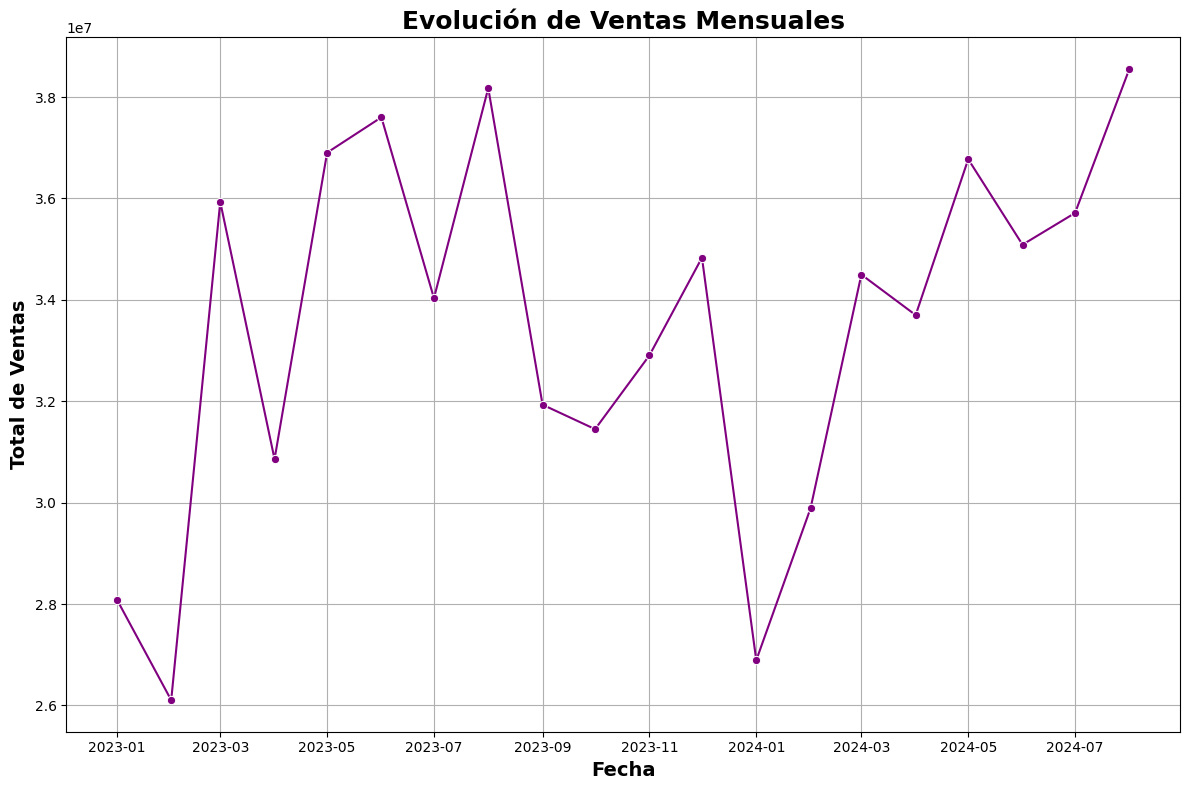

In [27]:
# Creamos la fecha completa, para trabajar con una sola variable
data_actuals['DATE'] = pd.to_datetime(data_actuals[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar y sumar las ventas por fecha (por mes)
sales_by_date = data_actuals.groupby('DATE')['AMOUNT'].sum().reset_index()

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.lineplot(x='DATE', y='AMOUNT', data=sales_by_date, marker='o', color='purple')
plt.title('Evolución de Ventas Mensuales', fontsize=18, fontweight='bold')
plt.xlabel('Fecha', fontsize=14, fontweight='bold')
plt.ylabel('Total de Ventas', fontsize=14, fontweight='bold')
plt.grid(True)
plt.tight_layout()

plt.show()


Según cada marca

<ipython-input-28-55ef85e44b56>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='SUBBRAND', y='AMOUNT', data=sales_by_brand, palette='magma')


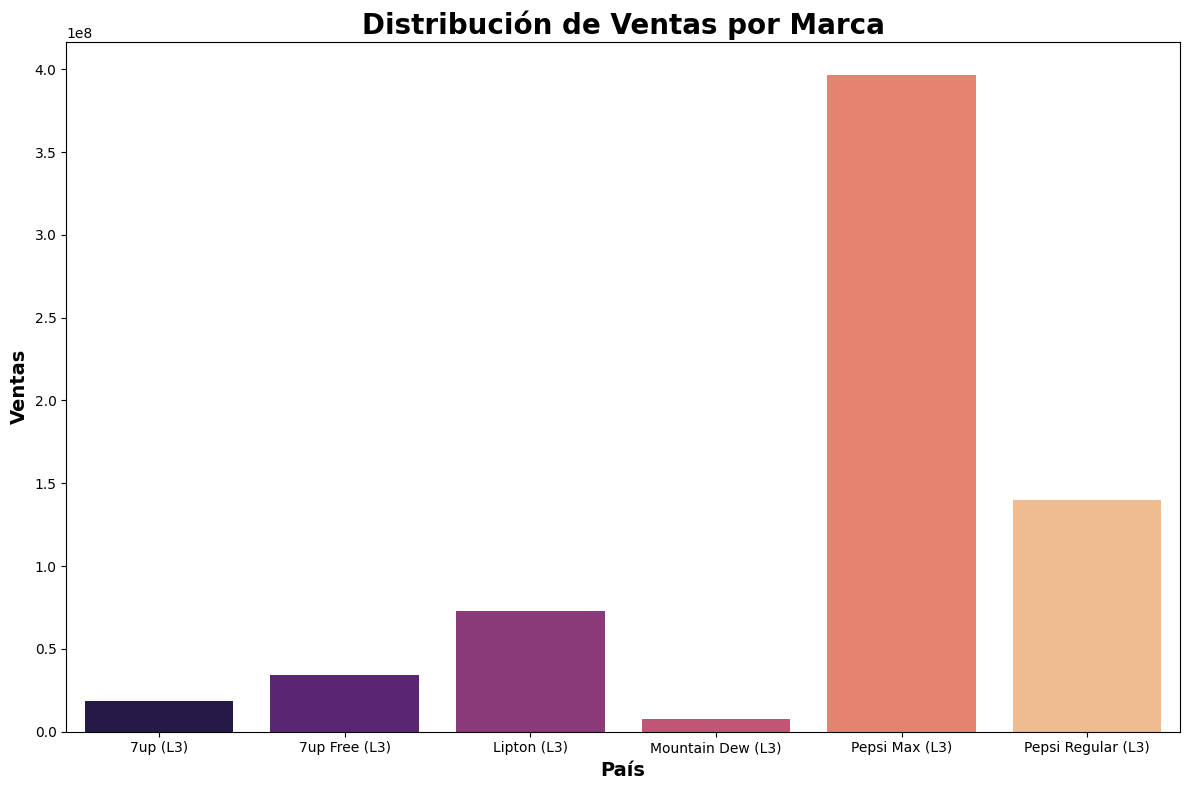

In [28]:
# De misma forma que con los apartados anteriores
sales_by_brand = data_actuals.groupby('SUBBRAND')['AMOUNT'].sum().reset_index()
#print(sales_by_brand)

# Configuración del gráfico
plt.figure(figsize=(12, 8))
sns.barplot(x='SUBBRAND', y='AMOUNT', data=sales_by_brand, palette='magma')
plt.title('Distribución de Ventas por Marca', fontsize=20, fontweight='bold')
plt.xlabel('País', fontsize=14, fontweight='bold')
plt.ylabel('Ventas', fontsize=14, fontweight='bold')
plt.tight_layout()

plt.show()

# **2. Tendencia y estacionalidad**

Todas las ventas del país con menos ventas

<ipython-input-32-6eb56ce4c8bf>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_min_sales_country['DATE'] = pd.to_datetime(data_min_sales_country[['YEAR', 'MONTH']].assign(DAY=1))


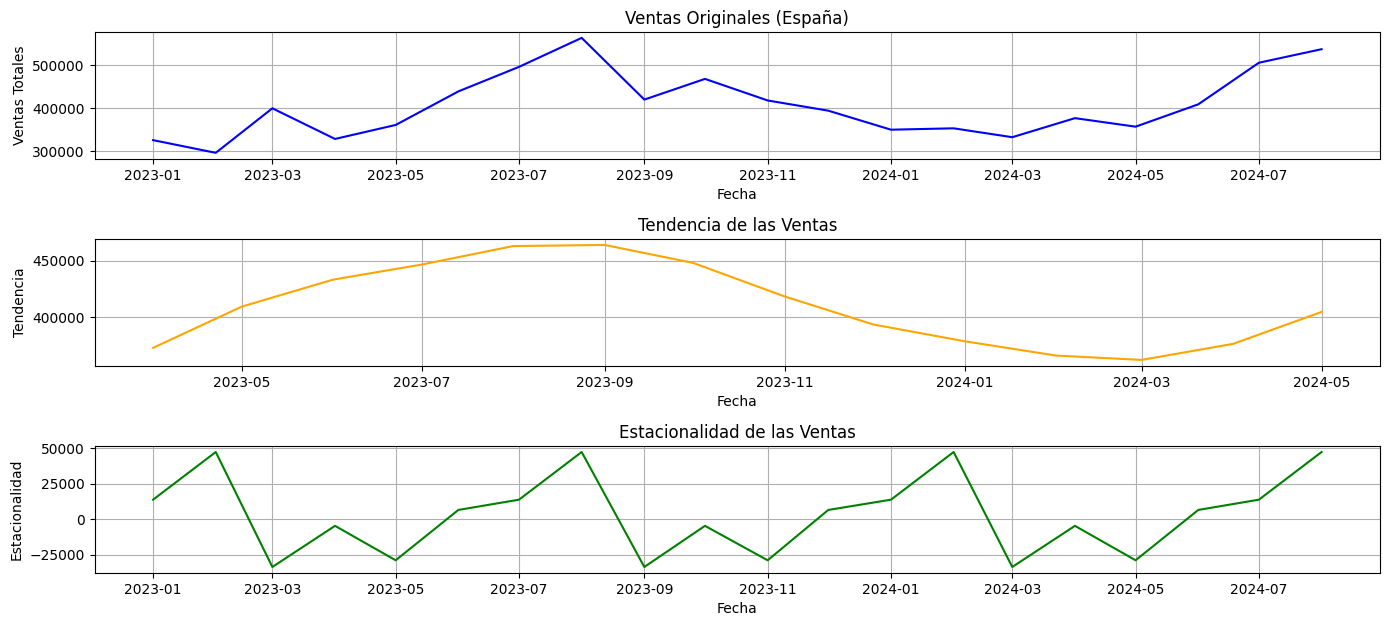

In [32]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Encontrar el país con menos ventas usando el índice del valor mínimo (idxmin)
country_min_sales = sales_by_country.loc[sales_by_country['AMOUNT'].idxmin(), 'COUNTRY']

# Filtrar los datos para el país con menos ventas
data_min_sales_country = data_actuals[data_actuals['COUNTRY'] == country_min_sales]

# Creamos la fecha completa, para trabajar con una sola variable
data_min_sales_country['DATE'] = pd.to_datetime(data_min_sales_country[['YEAR', 'MONTH']].assign(DAY=1))

# Filtrar los datos para el análisis de tendencia y estacionalidad
ventas_pais = data_min_sales_country.groupby(['DATE'])['AMOUNT'].sum()

# Serie temporal
resultados_decomposicion = seasonal_decompose(ventas_pais, model='additive', period=6)

# Configuración del gráfico
plt.figure(figsize=(14, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(ventas_pais, label='Ventas Originales', color='blue')
plt.title('Ventas Originales (España)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)

# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(resultados_decomposicion.trend, label='Tendencia', color='orange')
plt.title('Tendencia de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Tendencia')
plt.grid(True)

# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(resultados_decomposicion.seasonal, label='Estacionalidad', color='green')
plt.title('Estacionalidad de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.grid(True)

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()


La marca con más ventas

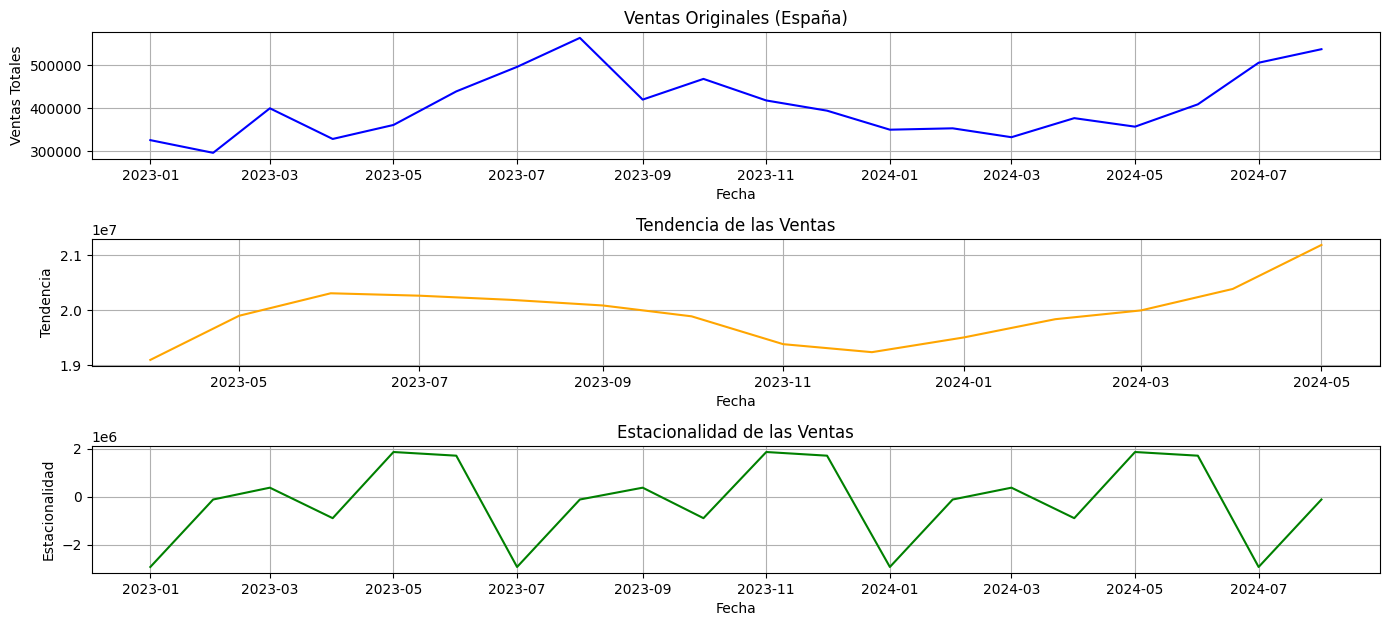

In [34]:
# Encontrar la submarca con más ventas usando el índice del valor máximo
subbrand_max_sales = sales_by_brand.loc[sales_by_brand['AMOUNT'].idxmax(), 'SUBBRAND']

# Filtrar los datos para la submarca con más ventas
data_max_sales_subbrand = data_actuals[data_actuals['SUBBRAND'] == subbrand_max_sales]

# Ordenar los datos de la submarca con más ventas por fecha
data_max_sales_subbrand = data_max_sales_subbrand.sort_values(by='DATE')

# Filtrar los datos para el análisis de tendencia y estacionalidad
ventas_subbrand = data_max_sales_subbrand.groupby(['DATE'])['AMOUNT'].sum()

# Serie temporal
resultados_decomposicion = seasonal_decompose(ventas_subbrand, model='additive', period=6)

# Configuración del gráfico
plt.figure(figsize=(14, 8))

# Gráfico de la serie original
plt.subplot(4, 1, 1)
plt.plot(ventas_pais, label='Ventas Originales', color='blue')
plt.title('Ventas Originales (España)')
plt.xlabel('Fecha')
plt.ylabel('Ventas Totales')
plt.grid(True)

# Gráfico de la tendencia
plt.subplot(4, 1, 2)
plt.plot(resultados_decomposicion.trend, label='Tendencia', color='orange')
plt.title('Tendencia de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Tendencia')
plt.grid(True)

# Gráfico de la estacionalidad
plt.subplot(4, 1, 3)
plt.plot(resultados_decomposicion.seasonal, label='Estacionalidad', color='green')
plt.title('Estacionalidad de las Ventas')
plt.xlabel('Fecha')
plt.ylabel('Estacionalidad')
plt.grid(True)

# Ajustar y mostrar los gráficos
plt.tight_layout()
plt.show()

# **3. Cuáles son las predicciones hechas en España y cómo de buenas son.**

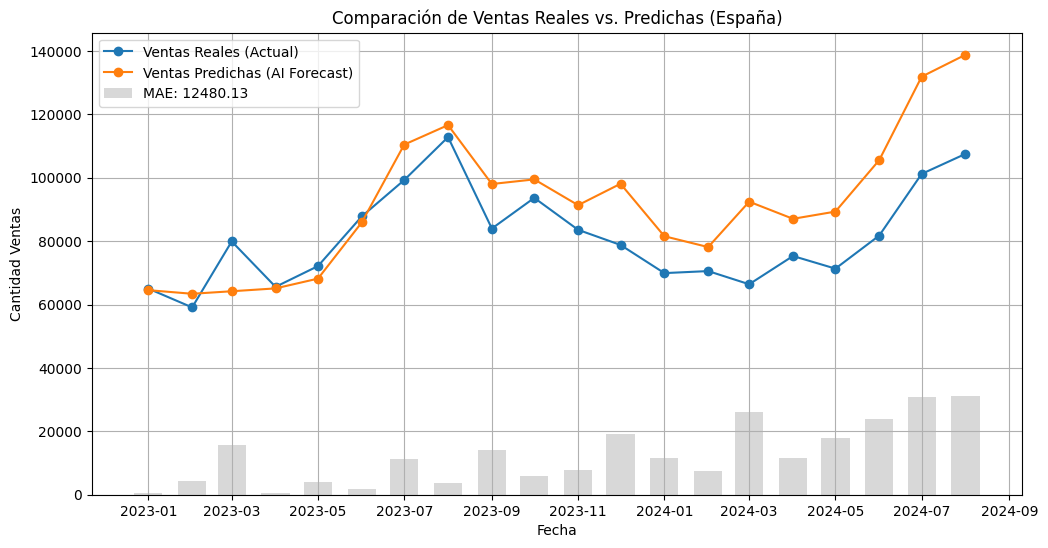

In [31]:
# Filtrar los datos para España
df_spain = datos[datos['COUNTRY'] == 'Spain'].copy()

# Crear DataFrames separados para las ventas actuales y predichas
df_actual = df_spain[df_spain['SCENARIO'] == 'actual'].copy()
df_AI_forecast = df_spain[df_spain['SCENARIO'] == 'AI_forecast'].copy()

# Crear la columna de fecha
df_actual['DATE'] = pd.to_datetime(df_actual[['YEAR', 'MONTH']].assign(DAY=1))
df_AI_forecast['DATE'] = pd.to_datetime(df_AI_forecast[['YEAR', 'MONTH']].assign(DAY=1))

# Agrupar y sumar las ventas por MES y año
sales_actual = df_actual.groupby(df_actual['DATE'].dt.to_period("M"))['AMOUNT'].mean().reset_index()
sales_actual['DATE'] = sales_actual['DATE'].dt.to_timestamp()

sales_forecast = df_AI_forecast.groupby(df_AI_forecast['DATE'].dt.to_period("M"))['AMOUNT'].mean().reset_index()
sales_forecast['DATE'] = sales_forecast['DATE'].dt.to_timestamp()

# Unir ambos DataFrames por fecha, manteniendo solo las filas donde hay datos en ambos
# (eliminamos los datos con predicciones a futuro para los que no tenemos valores reales)
comparacion = pd.merge(sales_actual, sales_forecast, on='DATE', how='inner', suffixes=('_Actual', '_Forecast'))
comparacion = comparacion.dropna(subset=['AMOUNT_Forecast'])

# Calcular el MAE entre ventas reales y predichas
comparacion['MAE'] = abs(comparacion['AMOUNT_Actual'] - comparacion['AMOUNT_Forecast'])

# Configuración del gráfico
plt.figure(figsize=(12, 6))
plt.plot(comparacion['DATE'], comparacion['AMOUNT_Actual'], marker='o', label='Ventas Reales (Actual)')
plt.plot(comparacion['DATE'], comparacion['AMOUNT_Forecast'], marker='o', label='Ventas Predichas (AI Forecast)')
plt.bar(comparacion['DATE'], comparacion['MAE'], width=20, color='gray', alpha=0.3, label=f'MAE: {comparacion["MAE"].mean():.2f}')
plt.title('Comparación de Ventas Reales vs. Predichas (España)')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Ventas')
plt.grid(True)
plt.legend()

plt.show()


La comparación entre las ventas reales y las predichas en España muestra que el modelo de predicción captura en gran medida la tendencia general de las ventas a lo largo del tiempo, aunque existen algunas desviaciones en ciertos meses. El MAE (Error Absoluto Medio) de aproximadamente 12,480 sugiere una precisión razonable en las predicciones, para el tipo de datos con el que estamos trabajando, aunque podría beneficiarse de ajustes adicionales para reducir el error en períodos específicos. En el gráfico, se observa que el modelo predice correctamente los picos y valles de ventas, pero en algunos momentos se desvía de las ventas reales, lo que indica áreas de mejora en la precisión del modelo.






